<h1>Countries Segmentation using K-Means
    
<h4>By: Giovanni Abel Christian <br> <br> 
<br>
Data Source: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data



In [6]:
# Mengimpor library yang dibutuhkan
import numpy as np # Impor library numpy sebagai np
import pandas as pd # Impor library pandas sebagai pd
import matplotlib.pyplot as plt #Impor library matplotlib.pyplot sebagai plt
import seaborn as sns  #Impor library seaborn sebaga sns


import os #impor library os

#Penjelasan library yang dipakai
# - numpy: library untuk manipulasi n-dimensional array
# - pandas:library untuk manipulasi dan analisis data
# - matplotlib.pyplot: library untuk membuat figure dan plotting
# - seaborn: library untuk untuk mengatur tampilan aestetik dari plot
# - os:library agar python berinteraksi langsung dengan sistem

In [7]:
dataset = pd.read_csv('Country-data.csv') # dataset <- Counstry-data.csv, mengimpor file Country-data dan disimpan sebagai pandas dataframe pada variabel dataset
dataset.head(10) #Menampilkan 10 baris pertama pada variabel dataset

#Penjelasan variabel dalam dataset:
# - country: nama negara
# - child_mort: kematian anak dibawah 5 tahun per 1000 kelahiran
# - exports: ekspor barang dan jasa per capita
# - health: pengeluaran biaya kesehatan per capita
# - imports: impor barang dan jasa per capita 
# - income: total pendapatan per orang
# - inflation: Pengukuran pertumbuhan tahunan dari jumlah PDB
# - life_excpec: angka rata-rata umur
# - total_fer: Angka rata-rata kelahiran anak per wanita
# - gdpp: PDB per capita

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
dataset.shape #Menampilkan ukuran dari object dataset dalam netuk (jumlah baris, jumlah kolom3)

(167, 10)

In [10]:
dataset.info() # Menampilkan informasi umum mengenai objek
# Informasi yang ditampikan adalah:
# - Class atau jenis objek variabel
# - Jumlah baris atau observasi data
# - Jumah kolom data
# - Tipe data setiap kolom, berapa banyak data dan apakah memiliki nilai NULL atau NaN
# - Besaran file data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
dataset.isnull().sum() # Menghitung jumlah nilai NULL pada dataset, untuk setiap kolomnya. isnull() untuk mencari nilai null dan .sum() untuk menjumlahkan nilai yang ditemukan
# Hasil di bawah menampilkan bahwa semua kolom memiliki angka 0, artinya semua kolom pada data set tidak memiliki satupun NULL

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
X= dataset.iloc[:, [5,7]].values # menetapkan variabel X yang berisi, nilai fitur dari kolom income dan life_expec Variabel disimpan dalam pandas array dan hanya menampilkan nilai dari kedua kolom

In [13]:
dataset.iloc[:,[0,5,7]]

,country,income,life_expec
0,Afghanistan,1610,56.2
1,Albania,9930,76.3
2,Algeria,12900,76.5
3,Angola,5900,60.1
4,Antigua and Barbuda,19100,76.8
...,...,...,...
162,Vanuatu,2950,63.0
163,Venezuela,16500,75.4
164,Vietnam,4490,73.1
165,Yemen,4480,67.5


In [23]:
dataset.iloc[:,[0,5,7]].describe().round(2) 

,income,life_expec
count,167.00,167.00
mean,17144.69,70.56
std,19278.07,8.89
min,609.00,32.10
25%,3355.00,65.30
50%,9960.00,73.10
75%,22800.00,76.80
max,125000.00,82.80


In [14]:
# Pembuatan model KMeans untuk menentukan nilai K yang cocok
from sklearn.cluster import KMeans # Impor library sklearn.cluster sebagai KMeans, untuk pembuatan model clustering KMeans
wcss=[] # Menetapkan variabel wcss sebagai sebuah list yang kosong. [] digunakan untuk membuat list

# wcss adalah total jarak setiap observasi ke centroid
# semakin kecil nilai wcss maka semakin mirip setiap observasi dalam 1 cluster, makan model dibilang bagus jika memiliki wcss yang kecil

# Model KMeans dibuat dengan cara membuat iterasi untuk penentuan jumlah cluster (k) dari 1 hingga 10
# nilai wcss nantinya akan diambil dari model, dan disimpan dalam variabel wcss dalam bentuk list 


for i in range(1,11):                                                      # Untuk setiap angka dari 1 sampai 10 disebut sebagai i
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)       # Buat sebuah model Kmeans dengan parameter n_clusters sebesar i, paramater initnya adalah 'kmeans++' dan parameter random_statenya 0
    kmeans.fit(X)                                                          # training model kmeans menggunakan data dalam variabel X
    wcss.append(kmeans.inertia_)                                           # Menambah kan nilai inertia dari model ke dalam list wcss, inertia adalah rumus untuk segregasti poin data ke dalam cluster
    
#Penjelasan Parameter KMeans:
# - n_clusters: Jumlah cluster atau penglompokan yang diinginkan
# - init: Metode inisiasi, metode 'k-mean++' memilih titik tengah awal untuk clustering dengan cara yang cerdas untuk mempercepat konvergensi
# - random_state: Menetapkan angka secara acak untuk inisiasi awal titik centroid cluster

C:\Users\giova\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\giova\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\giova\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\giova\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

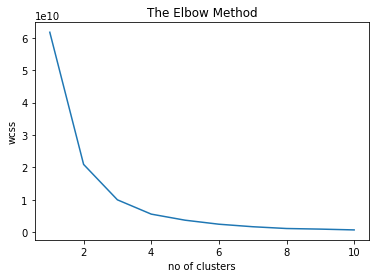

In [15]:
#Visualisasi nilai grafik Elbow Method untuk menentukan nilai K yang diharapkan
plt.plot(range(1,11), wcss) #Membuat line chart dimana parameternya adalah nilai x adalah 1-10 dan y adalah nilai dari list wcss
plt.title('The Elbow Method') # memberi nama label 'The Elbow Method' di atas grafik sebagai judul
plt.xlabel('no of clusters') # memberi nama label 'no of clusters' pada sumbu x
plt.ylabel('wcss') # memberi nama label 'wcss' pada sumbu y 
plt.show() #menampilkan plot dengan spesifikasi di atas

Grafik di atas menunjukan perubahan nilai wcss berdasarkan nilai cluster atau k yang ditentukan. Pemilihan nilai K berdasarkan titik di mana penurunann nilai wcss tidak terlalu signfiikan atau cukup landai. Berdasarkan grafik yang ditunjukan nilai k yang paling cocok adalah k=3. 

In [16]:
#Membuat model K means berdasarkan k = 3
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0) #Menetapkan variabel kmeansmodel berdasarkan model kmeans dengan parameter n_clusters sebesar 5, paramater initnya adalah 'kmeans++' dan parameter random_statenya 0

y_kmeans= kmeansmodel.fit_predict(X) # Menetapkan variabel y_kmeans yang berisi nilai prediksi cluster dari funsgi fit_predict() menggunakan model kmeansmodel 

#Karena ini adalah unsupervised learning di mana tidak ada variabel target, maka digunakan fungsi fit_predidct()

C:\Users\giova\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


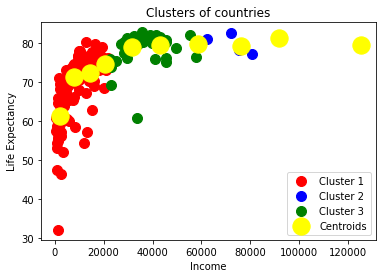

In [17]:
# Visualisasi semua data observasi sesuai clusternya dimana x adalah Annual Income dan y adalah Spending Score
# Visualisasi menggunakan grafik scatter plot agar dapat menampilkan nilai dari dua variabel menggunakan fungsi plt.scatter()
# Parameter plt.scatter(), yang dipakai
# - x : nilai data untuk sumbu x, dalam kasus ini nilai variabel Income  
# - y : nilai data untuk sumbu y, dalam kasus ini nilai variabel Life expectancy 
# - s : penentuan ukuran penanda poin data
# - c : penentuan warna untuk poin data
# - label : untuk memberikan label pada poin data, akan terlihat pada legenda
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #Membuat plot data untuk observasi-observasi yang jatuh pada Cluster 1 yang ditandai dengan warna merah dengan size = 100
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #Membuat plot data untuk observasi-observasi yang jatuh pada Cluster 2 yang ditandai dengan warna biru dengan size = 100
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') #Membuat plot data untuk observasi-observasi yang jatuh pada Cluster 3 yang ditandai dengan warna hijau dengan size = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') #membuat plot data untuk Centroid tiap cluster yang ditandai dengan warna kuning dengan size = 300
plt.title('Clusters of countries') # memberi nama label 'Clusters of customers' di atas grafik sebagai judul
plt.xlabel('Income') # memberi nama label 'Annual Income (k$)' pada sumbu x
plt.ylabel('Life Expectancy') # memberi nama label 'Spending Score (1-100)' pada sumbu y 
plt.legend() # menampilkan legenda pada plot
plt.show() # menampilkan plot sesuai dengan spesifikasi di atas

Penjelasan pengelompokan:
- Cluster 1: Menunjukan negara-negara yang memiliki angka harapan hidup yang rendah-tinggi dan pendapatan yang rendah
- Cluster 2: Menunjukan negara-negara yang memiliki angka harapan hidup yang tinggi dan pendapatan yang tinggi
- Cluster 3: Menunjukan negara-negara yang memiliki angka harapan hidup yang tinggi dan pendapatan yang menengah